# Using the Unsupervised Tuning Methods

In this notebook you can find a number of examples of how to use the unsupervied tuning methods. Note the examples rely on the iris data set which can be loaded in directly from the Eagle_ML package. Although the iris data set has species associated with each outcome these will be ignored during the clustering examples.

Currently impletmented clustering models for find_optimal_clusters() include:
- "kmeans"
- "agglomerativeclustering"
- "dbscan"

However eval_clusters() can take other sklearn cluster model objects

In [1]:
from eagles.Unsupervised import unsupervised_tuner as ut
from eagles.data_sets import data_loader as dl

c:\users\jonla\eaglemldev\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Load in the iris data set and set the columns that will be used for clustering examples

In [2]:
iris = dl.load_iris()
print(iris.shape)
ft_cols = [col for col in iris.columns if col != 'species']
print(ft_cols)

(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


## Using the find_optimal_clusters() functions

This function allows the user to pass in the datat to be clustered and finds an "optimal" number of clusters. When using kmeans or agglomerative clusters the metrics that can be used to find the optimal number of clusters include:
- max_sil: Determines the optimal number of cluster by finding the number of clusters that results in the max silhouette score 
- knee_wss: Determines the optimal number of clusters by using the KneeLocator method provided by the kneed package on the WSS as compared to the number of clusters.

Documentation for the KneeLocator method can be found via: https://github.com/arvkevi/kneed.

When DBSCAN is used the optimal number of clusters is determined by the method itself. See documentation provided at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html.


## Basic usage of the find_optimal_clusters() function with the kmeans algorithm.

Random Seed Value: 4
Max y: 152.36870647733915
y vals: 0    152.368706
1     78.940841
2     57.317873
3     46.550573
4     39.251831
5     34.284650
6     29.881402
7     27.839591
Name: y, dtype: float64


<Figure size 720x720 with 0 Axes>

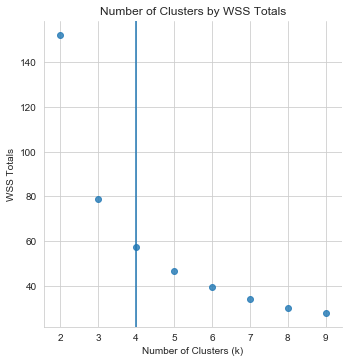

Optimal number of clusters: 4

Silhouette Score: 0.65
WSS Total: 57.32

Number of Observations per Cluster
0    50
1    40
3    32
2    28
Name: Cluster, dtype: int64


Base Cluster Stats 

Cluster               0     1     2     3
sepal_length mean  5.01  6.25  5.53  6.91
             std   0.35  0.34  0.32  0.50
             max   5.80  7.00  6.10  7.90
sepal_width  mean  3.42  2.85  2.64  3.10
             std   0.38  0.28  0.27  0.30
             max   4.40  3.40  3.00  3.80
petal_length mean  1.46  4.81  3.96  5.85
             std   0.17  0.29  0.39  0.45
             max   1.90  5.60  4.50  6.90
petal_width  mean  0.24  1.62  1.23  2.13
             std   0.11  0.27  0.19  0.24
             max   0.60  2.40  1.70  2.50
Cluster      mean  0.00  1.00  2.00  3.00
             std   0.00  0.00  0.00  0.00
             max   0.00  1.00  2.00  3.00



Significance Testing Results 

        Feature  p Val  Effect Size
0  sepal_length    0.0         0.79
1   sepal_width    0.0         0

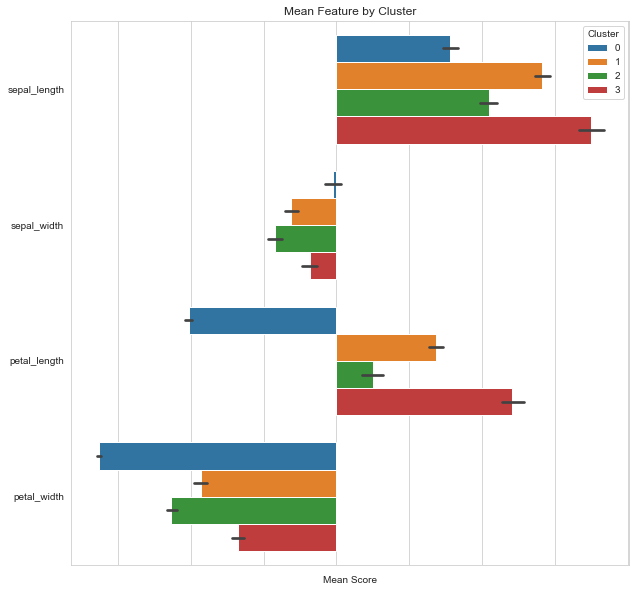

<Figure size 720x720 with 0 Axes>

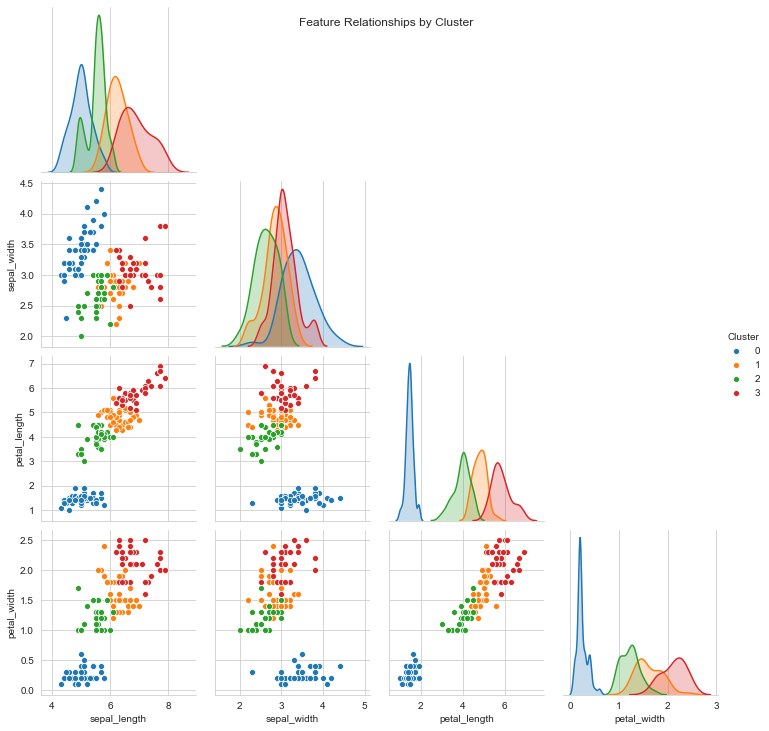

In [3]:
data = ut.find_optimal_clusters(
    data=iris,
    ft_cols=ft_cols,
    cluster_method="kmeans",
    metric="knee_wss",
    min_num_clusters=2,
    max_num_clusters=10,
    params={},
    scale=None,
    plot_dims=[],
    summary_stats=['mean','std','max'],
    run_stat_comps=True,
    plot_scale='standard',
    random_seed=4,
    log=None,
    log_name=None,
    log_path=None,
    log_note=None,
)

## Passing in parameters to the find_optimal_clusters() functions along with logging. 

The log note is optional and will be ignored if nothing is passed. Also when the log path is None the function will create a data directory within the eagles directory itself. 

Random Seed Value: 4
Best silhoutte score: 0.6863930543445408
Max y: 0.6863930543445408
y vals: 0    0.686393
1    0.553934
2    0.471665
3    0.430342
4    0.340659
5    0.369411
6    0.364544
7    0.316776
Name: y, dtype: float64


<Figure size 720x720 with 0 Axes>

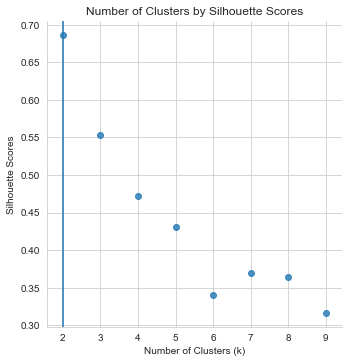

Optimal number of clusters: 2

Silhouette Score: 0.7
Number of Observations per Cluster
0    100
1     50
Name: Cluster, dtype: int64


Base Cluster Stats 

Cluster                 0     1
sepal_length median  6.30  5.00
             std     0.66  0.35
             max     7.90  5.80
sepal_width  median  2.90  3.40
             std     0.33  0.38
             max     3.80  4.40
petal_length median  4.90  1.50
             std     0.83  0.17
             max     6.90  1.90
petal_width  median  1.60  0.20
             std     0.42  0.11
             max     2.50  0.60
Cluster      median  0.00  1.00
             std     0.00  0.00
             max     0.00  1.00



Significance Testing Results 

        Feature  p Val  Effect Size
0  sepal_length    0.0         0.51
1   sepal_width    0.0         0.35
2  petal_length    0.0         0.85
3   petal_width    0.0         0.79


Pairwise Differences 

        Feature  A  B  Diff Between Means  p Val  Effect Size
0  sepal_length  0  1         

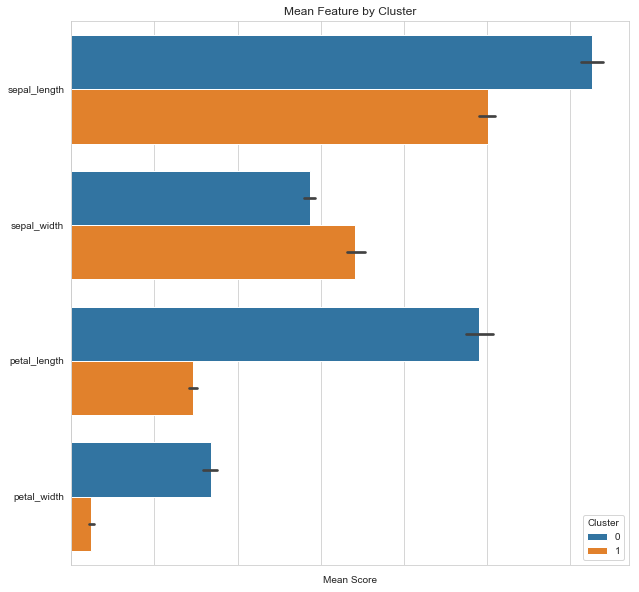

<Figure size 720x720 with 0 Axes>

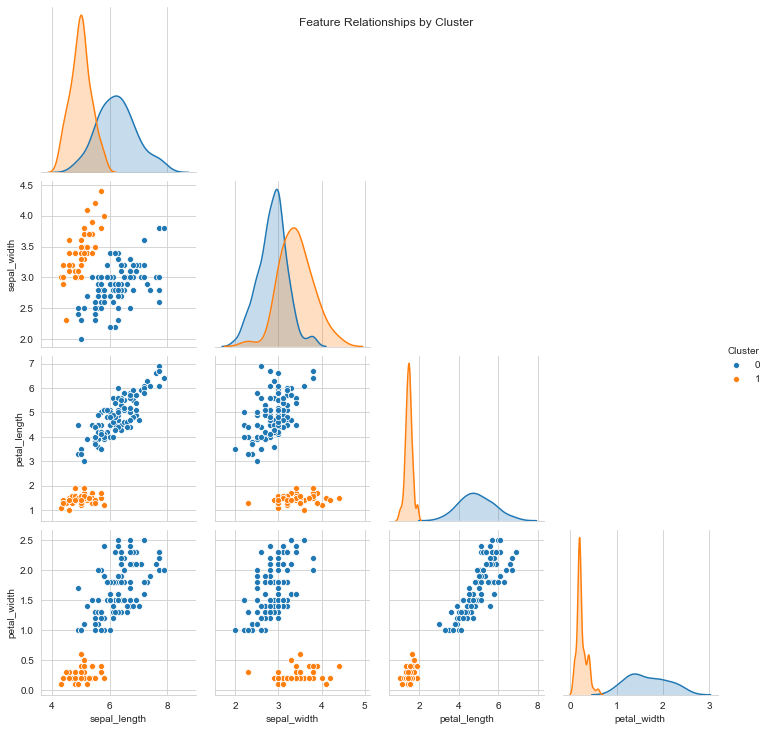

In [4]:
log_note = """
    This is an example of clustering useing the agglomerative clustering algorithm.
"""

model_params = {
    'linkage':'average'
    ,'affinity':'euclidean'
}

data = ut.find_optimal_clusters(
    data=iris,
    ft_cols=ft_cols,
    cluster_method="agglomerativeclustering",
    metric="max_sil",
    min_num_clusters=2,
    max_num_clusters=10,
    params=model_params,
    scale=None,
    plot_dims=[],
    summary_stats=['median','std','max'],
    run_stat_comps=True,
    plot_scale=None,
    random_seed=4,
    log='log',
    log_name='test.txt',
    log_path=None,
    log_note=log_note,
)

## Using the cluster_eval() function 

Silhouette Score: 0.68
WSS Total: 78.94

Number of Observations per Cluster
0    62
1    50
2    38
Name: Cluster, dtype: int64


Base Cluster Stats 

Cluster               0     1     2
sepal_length mean  5.90  5.01  6.85
             max   7.00  5.80  7.90
sepal_width  mean  2.75  3.42  3.07
             max   3.40  4.40  3.80
petal_length mean  4.39  1.46  5.74
             max   5.10  1.90  6.90
petal_width  mean  1.43  0.24  2.07
             max   2.40  0.60  2.50
Cluster      mean  0.00  1.00  2.00
             max   0.00  1.00  2.00



Significance Testing Results 

        Feature  p Val  Effect Size
0  sepal_length    0.0         0.72
1   sepal_width    0.0         0.44
2  petal_length    0.0         0.94
3   petal_width    0.0         0.90


Pairwise Differences 

        Feature  A  B  Diff Between Means  p Val  Effect Size
0  sepal_length  0  1                0.90    0.0         2.02
1  sepal_length  0  2               -0.95    0.0        -2.14
2  sepal_length  1  2       

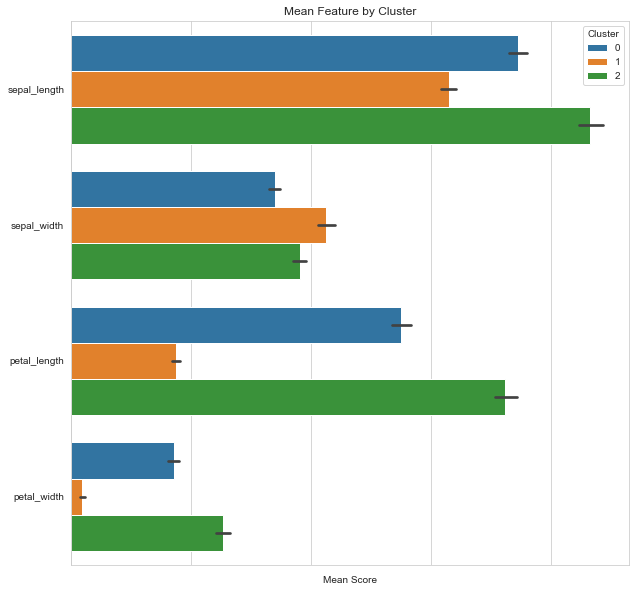

<Figure size 720x720 with 0 Axes>

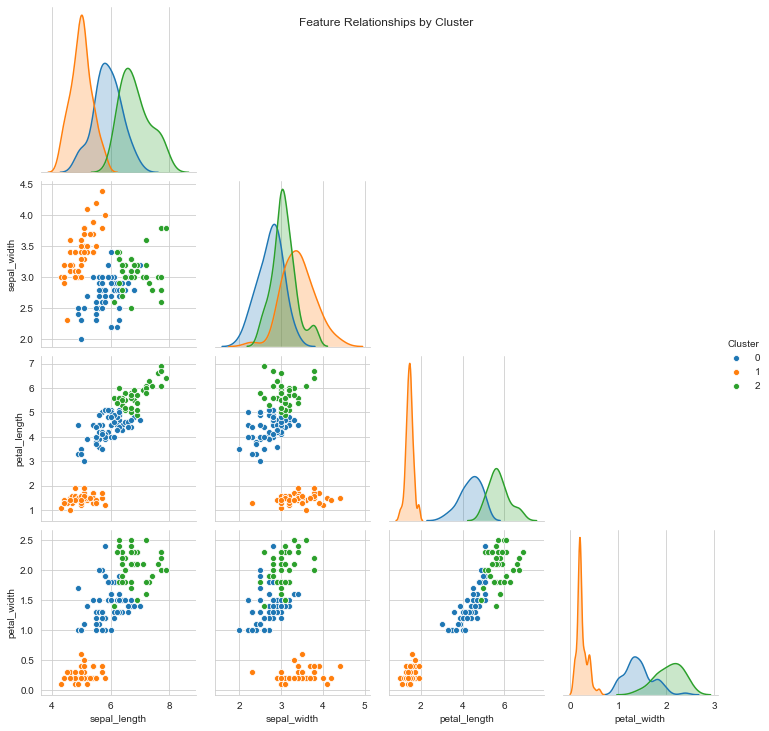

In [6]:
data = ut.eval_clusters(
    data=iris,
    n_clusters=3,
    method="kmeans",
    params={},
    scale=None,
    ft_cols=ft_cols,
    plot_dims=[],
    summary_stats=["mean", "max"],
    run_stat_comps=True,
    plot_scale="minmax",
    log="log",
    log_name=None,
    log_path=None,
    log_note=None,
)